In [7]:
import pandas as pd 
import cv2
import matplotlib.pyplot as plt  
import numpy as np
import requests

In [10]:
url = "http://192.168.43.1:8080/shot.jpg"
ImageData=[]
update=0
text='Calculating'
font = cv2.FONT_HERSHEY_SIMPLEX
while True:
    update+=1
    img_resp = requests.get(url)
    img_arr = np.array(bytearray(img_resp.content), dtype=np.uint8)
    img = cv2.imdecode(img_arr, -1)
    img = cv2.resize(img, (600,600))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ImageData.append(np.sum(img)/360000)
    if len(ImageData)>100:#100 frame so we can get upto freq50 Hz which equals to 50*3.14*2 heart beat
        ImageData.pop(0)
        if update%15==0:#Refresh every 15 frame
            n=len(ImageData)
            fhat=np.fft.fft(ImageData,n)
            PSD=fhat*np.conj(fhat)/n
            PSD=PSD[5:30]#offset of 5, for correct heartbeat which is under 5-30hz
            maxval=np.max(PSD)
            pulse=np.array(np.where(PSD>(9*maxval/10))).astype(np.float32)
            pulse+=5#offset cleared
            pulse=2*3.14*pulse
            if pulse.shape[1]>=1:
                text='{}'.format(int(pulse[0][0]))
            else:
                text='Not Found'

    img=cv2.putText(img, text, (50,50), font, 
            1, (255,0,0), 2, cv2.LINE_AA)

    cv2.imshow("Heart Rate", img)


	# Press Esc key to exit
    if cv2.waitKey(1) == 27:
        break

cv2.destroyAllWindows()

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-k8sx3e60\opencv\modules\imgcodecs\src\loadsave.cpp:753: error: (-215:Assertion failed) !buf.empty() in function 'cv::imdecode_'


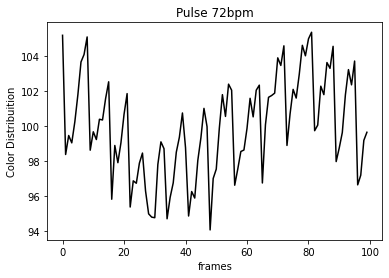

In [9]:
plt.plot(list(range(len(ImageData))),ImageData,color='k')
plt.xlabel('frames')
plt.ylabel('Color Distribuition')
plt.title('Pulse 72bpm')
plt.show()

#Analysis Here

In [2]:
cap = cv2.VideoCapture(r'C:\Users\saurabh\Documents\Desktop\Neural Network and Deep Learning\HeartRate\72.mp4')
Colordata1=[]
grayscaledata1=[]
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        cv2.imshow('Frame', frame)
        grayframe=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        grayscaledata1.append(np.sum(grayframe)/(grayframe.shape[0]*grayframe.shape[1]))


        # Press Q on keyboard to exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

    else:
        break
cap.release()
cv2.destroyAllWindows()


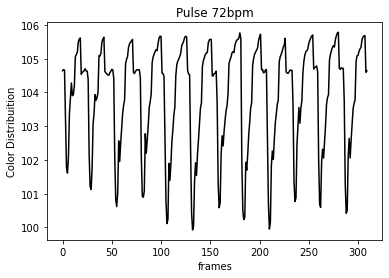

In [4]:
plt.plot(list(range(len(grayscaledata1))),grayscaledata1,color='k')
plt.xlabel('frames')
plt.ylabel('Color Distribuition')
plt.title('Pulse 72bpm')
plt.show()

#Using FFT to find wave in Heart

In [5]:
n1=len(grayscaledata1)

C:\Users\saurabh\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


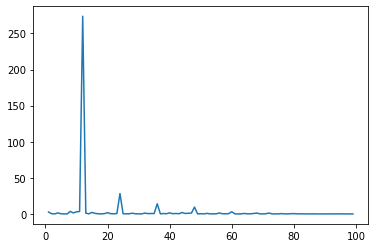

In [17]:
fhat1=np.fft.fft(grayscaledata1,n1)
PSD1=fhat1*np.conj(fhat1)/n1
freq1=np.arange(100)#Between 0 and freq plot
L1=np.arange(1,np.floor(100),dtype='int')#Since Half is just symmetrical
plt.plot(freq1[L1],PSD1[L1])
plt.show()